In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from scipy.interpolate import interp1d
from scipy.optimize import minimize
sys.path.append('documents/BNL/jupyter/notebooks/calibrator')
os.environ['LUSEE_DRIVE_DIR']='/home/anze/work/lusee/Drive/'
from algorithms import  Comb, Calibrator
import pickle

In [2]:
Asfix=np.load('Asfix.npy')
Ns=np.load('Ns.npy')
Nsf = np.load('Nsf.npy')
kar = np.load('kar.npy')
Nsf.shape

(2048,)

In [29]:
np.random.seed(122)
comb=Comb(kar,response=Asfix, noise=Ns, noise_full=Nsf)
C = Calibrator(comb, alpha=+0.3, dalpha_dt = -0.0002, add_noise=True, export=None, sA=None, sc=None, ssig=None, Nintg=256, Nstage3=128)
C.analyze_data(alpha_start=+0.0,tmax=600)
C.cross_correlate()
res = C.results

#comb=Comb(kar,response=2*Asfix, noise=Ns)
#C = Calibrator(comb, alpha=-0.3, add_noise=True)
#C.analyze_data(alpha_start=+0.3,tmax=60)
#C.cross_correlate()
#res2 = C.results



t= res['t']

Non zero weights 219
ADA: (0.0021463992274298157+0.0007932486552890559j)
ADA: (-0.023562711476383228+0.004194359430161916j)
ADA: (-0.0025381098404521837-0.009609644228047887j)
ADA: (-0.006347766973238983+0.005811857589416848j)
ADA: (-0.0013260249004849898-0.00047287330671973464j)
ADA: (-0.010185283905319115+0.01171627302343122j)
ADA: (-0.012969150014114993-0.008794368822204609j)
ADA: (0.003243470802848002+0.0039174224407880955j)
PROD 0j (3.243470802848002e-09-3.917422440788095e-09j)
FDSD 0.0 0.0
And now: (3.243470802848002e-09+3.917422440788095e-09j) (1-0j) (3.243470802848002e-09+3.917422440788095e-09j)
ADA: (0.011518900011471161+0.0015749061942306782j)
PROD (3.243470802848002e-09+3.917422440788095e-09j) (1.151890001147116e-08-1.5749061942306782e-09j)
FDSD 4.4395499605705184e-11 -8.562339609046292e-09
And now: (1.0275808123784952e-08+6.5065412159335576e-09j) (0.5910147418282842+0.806660755796169j) (1.151890001147116e-08+1.5749061942306782e-09j)
ADA: (0.018157382490478716+0.004978696300

/home/anze/Dropbox/work/lusee/notebooks/calibrator/algorithms.py:347: RuntimeWarning: divide by zero encountered in divide
  phased_l = l*np.exp(-1j*phi*self.comb.kcomb)*np.conj(self.comb.code)/self.comb.true_resp/(self.Nintg*self.Nstage3)
/home/anze/Dropbox/work/lusee/notebooks/calibrator/algorithms.py:347: RuntimeWarning: invalid value encountered in divide
  phased_l = l*np.exp(-1j*phi*self.comb.kcomb)*np.conj(self.comb.code)/self.comb.true_resp/(self.Nintg*self.Nstage3)


In [30]:
res['SNR2']

array([0.78438878, 1.11126354, 1.09509937, ..., 4.36170058, 4.25618144,
       4.39596804])

In [31]:

res['stage3_Nacc']

array([128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128])

In [32]:
res['stage3'][:,0]

array([-1.99404298e-08+3.41852888e-07j,  5.18987295e-08+3.80804201e-07j,
       -1.54312561e-07+3.93467338e-07j, -5.05161424e-08+3.50130645e-07j,
        1.30611532e-07+3.93783640e-07j,  3.38398991e-07+3.13377944e-07j,
        4.06731308e-07+2.18288477e-07j,  2.71752782e-07+1.95490472e-08j,
        3.01702386e-07+2.44187829e-07j,  2.70160058e-07+3.47745702e-07j,
        5.01892145e-07-4.47279305e-08j,  9.99408813e-08-2.51097726e-07j,
       -6.47226379e-08-3.51123347e-07j, -2.15729667e-07-1.40589826e-07j,
        2.32596558e-07-4.20529505e-07j, -5.68932479e-08-1.46779081e-07j,
       -2.46181727e-07+1.04531074e-07j, -2.35112041e-07+2.48733166e-07j,
       -8.13446725e-08+3.12365024e-07j, -4.56883000e-07+1.49784908e-08j,
       -2.16763078e-07+4.22739154e-07j,  2.95595993e-07+3.96469345e-07j,
        3.69905996e-07+5.12935707e-07j,  4.60518407e-07+5.38090512e-08j,
       -2.67498376e-08-3.98301977e-07j, -5.43762635e-08-2.51750596e-07j,
       -4.78660121e-07-2.53588659e-07j, -3.62332535

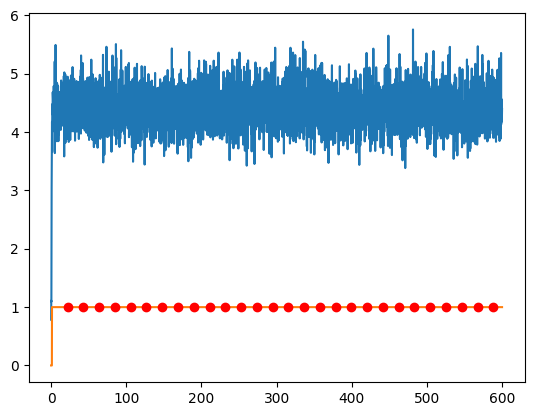

In [33]:
plt.plot (t, res['SNR2'])
#plt.plot (t, res2['SNR2'])

plt.plot (t, res['detect3'])
plt.plot(res['stage3_time'],np.ones(len(res['stage3_time'])),'ro')


Text(0, 0.5, 'clock drift [ppm]')

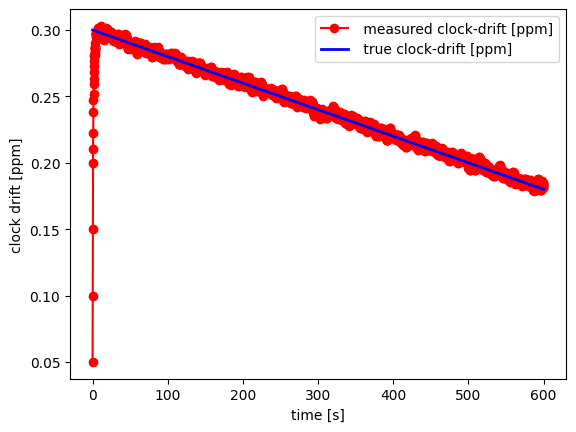

In [34]:
#plt.figure(figsize=(20,10))
t = res['t']
#plt.plot(t,res['detect']>0)
#plt.plot(t,res['detect3'])
plt.plot(t,res['alphadet'],'ro-', label=' measured clock-drift [ppm]')
plt.plot(t,-res['alpha'],'b-',lw=2, label=' true clock-drift [ppm]')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('clock drift [ppm]')
#plt.xlim(250,500)

Text(0, 0.5, 'response')

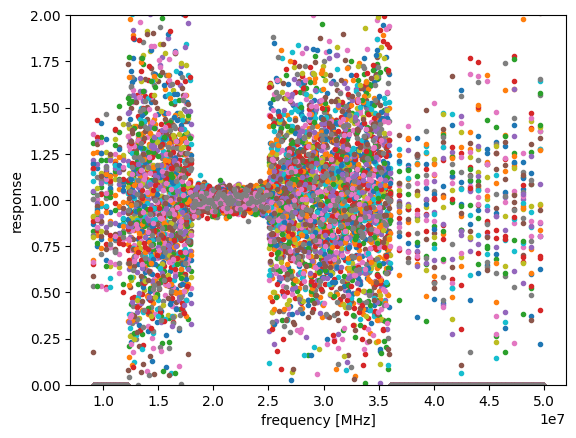

In [35]:
sp = res['stage3_phased']
sp[np.isnan(sp)]=0

plt.plot(C.comb.fcomb,np.real(res['stage3_phased'].T),'.')
#plt.plot(C.comb.fcomb, np.imag(res['stage3_phased'].T),'.')
plt.ylim(0,2)
plt.xlabel('frequency [MHz]')
plt.ylabel('response')

Text(0, 0.5, 'response')

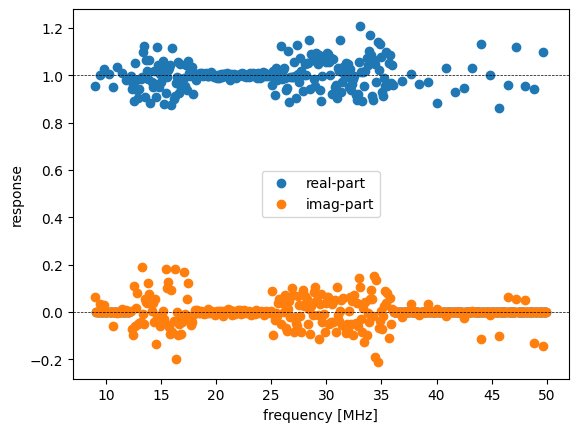

In [40]:
avg = res['stage3_phased'].mean(axis=0)
plt.plot(C.comb.fcomb/1e6, np.real(avg),'o', label='real-part')
plt.plot(C.comb.fcomb/1e6, np.imag(avg),'o', label='imag-part')
plt.axhline(1, color='black', lw=0.5, ls='--')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.xlabel('frequency [MHz]')
plt.ylabel('response')
#plt.ylim(-0.2,1.25)

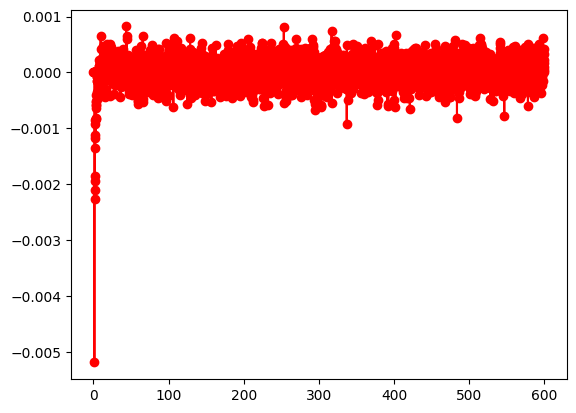

In [37]:
plt.plot(t,res['ofs3'],'ro-')

In [38]:
res['stage3_time']

array([ 22.03646,  43.00798,  63.9795 ,  84.95102, 105.92254, 126.89406,
       147.86558, 168.8371 , 189.80862, 210.78014, 231.75166, 252.72318,
       273.6947 , 294.66622, 315.63774, 336.60926, 357.58078, 378.5523 ,
       399.52382, 420.49534, 441.46686, 462.43838, 483.4099 , 504.38142,
       525.35294, 546.32446, 567.29598, 588.2675 ])

In [27]:
res['stage3_phased'].shape

(1, 410)

In [182]:
ml = np.loadtxt('meta.dat')

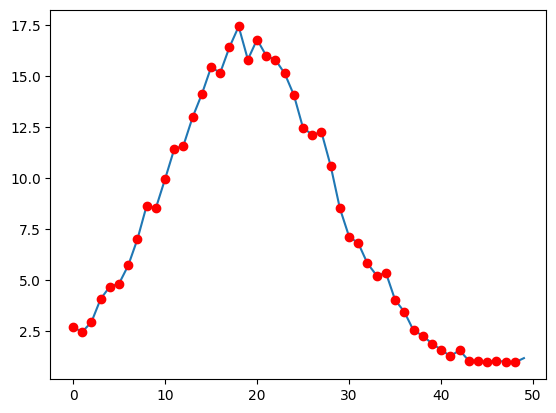

In [183]:
plt.plot (ml[:,1])
plt.plot(res['SNR2'],'ro')

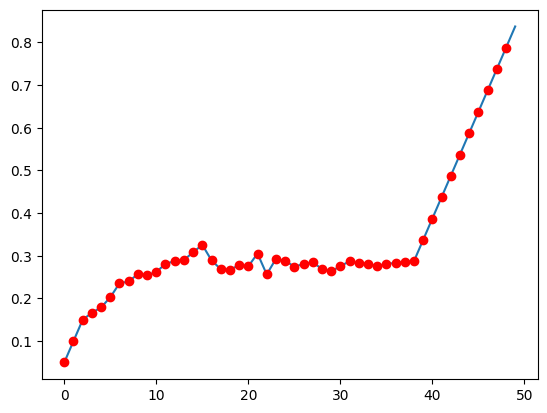

In [184]:
plt.plot (ml[:,0])
plt.plot(res['alphadet'],'ro')

In [185]:
a=np.loadtxt('output.dat')
ar = a[:,1::2]
ai = a[:,2::2]
ac = ar+1j*ai
w = np.where(ar[0,:]!=0)

/usr/local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


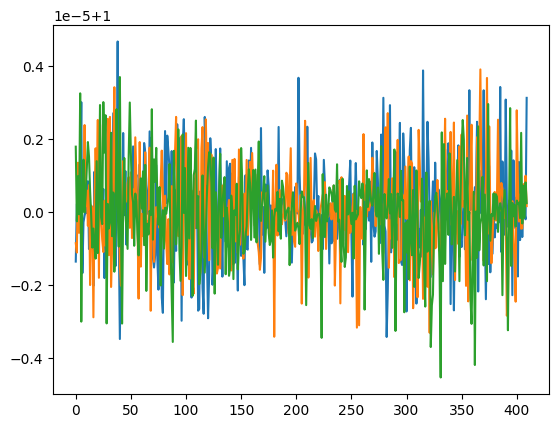

In [186]:
#plt.plot(ar[0,w[0]])
plt.plot(ac[0,w[0]]/res['stage3'][0,:]/1e5)
plt.plot(ac[1,w[0]]/res['stage3'][1,:]/1e5)
plt.plot(ac[2,w[0]]/res['stage3'][2,:]/1e5)



array([ 6.46496089e-09-1.73598128e-08j, -5.81401471e-09+3.43741304e-08j,
       -2.22945056e-08-5.69075670e-09j, -1.06579379e-08-6.07849283e-08j,
       -4.46741262e-08+2.50927625e-08j, -2.65742942e-08+2.60206733e-08j,
       -4.77188390e-08-1.32104040e-08j, -2.08168883e-08+1.20853565e-08j,
        4.25260487e-08-3.86180569e-08j, -4.96115638e-08+5.05994123e-08j,
       -3.16297617e-08-1.59035685e-08j,  1.22790972e-08+1.15393835e-09j,
        2.23723105e-08-4.68794712e-09j, -1.50845237e-08+1.87388351e-08j,
       -2.21773745e-08+5.31147527e-08j, -3.33528582e-08+5.05958588e-08j,
       -1.00445224e-09+1.66532656e-08j,  1.48817926e-08+1.41063691e-09j,
        6.43289064e-08-3.64392589e-08j, -1.40692562e-08-2.35079257e-08j,
        3.05021056e-10+3.19947982e-08j,  9.31964995e-09-3.09619468e-08j,
        2.50368318e-08+2.18263523e-08j,  3.55220198e-09-6.21729028e-09j,
        5.79392527e-09-6.57477550e-09j,  1.93076621e-08+5.42537168e-08j,
       -1.04788463e-08-6.26974803e-08j, -6.32383700

In [ ]:

res['stage3_Nacc']

array([8, 8, 3])